In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd "/content/drive/My Drive/EVA4/Notebooks/S11"

/content/drive/My Drive/EVA4/Notebooks/S11


## Necessary Imports

In [3]:
import numpy as np

import torch
from torchvision import transforms
import torch.optim as optim
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR



from vision import dataloaders
from vision.utils import Helper
from vision.models.resnet import ResNet18
from vision.models.customeResNet import CustomModel
from vision.imagetransforms import TorchTransforms,  album_train_transforms, album_test_transforms
from vision.train_test_model import RunModel
from vision.lr_finder import LRFinder
from vision import plot_grad
from vision import train_test_model
from vision.lr_range_test import RangeTest


import matplotlib.pyplot as plt
%matplotlib inline

  pip install torch-lr-finder -v --global-option="amp"


## Wave Plotting

In [0]:
helper = Helper()

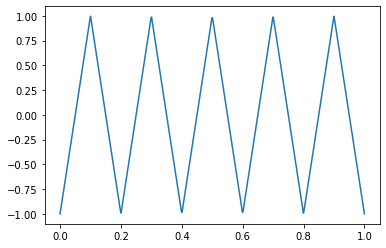

In [5]:
helper.plot_saw_tooth()

## Custom Resnet Model

In [0]:
Net = CustomModel()

In [7]:
size =  (3, 32, 32)
helper.model_summary(Net, size)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## Transforms and DataLoaders

In [0]:
train_transforms = album_train_transforms()
test_transforms = album_test_transforms()
loader = dataloaders.Loader(train_transforms, test_transforms, 'cifar10', batch_size=512)

In [9]:
train_dataloader  = loader.dataloader_train()
test_dataloader = loader.dataloader_test()
gradcam_dataloader = loader.dataloader_gradcam()

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


## LR Range Test

epoch = 1 Lr = 0.001  Loss=1.432793378829956 Batch_id=97 Accuracy=37.84: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]
epoch = 2 Lr = 0.0029  Loss=1.2067182064056396 Batch_id=97 Accuracy=43.23: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]
epoch = 3 Lr = 0.0048  Loss=1.144605040550232 Batch_id=97 Accuracy=43.94: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]
epoch = 4 Lr = 0.006699999999999999  Loss=1.2621564865112305 Batch_id=97 Accuracy=40.83: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]
epoch = 5 Lr = 0.0086  Loss=1.3445887565612793 Batch_id=97 Accuracy=33.83: 100%|██████████| 98/98 [00:21<00:00,  4.55it/s]
epoch = 6 Lr = 0.0105  Loss=1.627436637878418 Batch_id=97 Accuracy=24.70: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]
epoch = 7 Lr = 0.012400000000000001  Loss=1.7166693210601807 Batch_id=97 Accuracy=21.78: 100%|██████████| 98/98 [00:21<00:00,  4.53it/s]
epoch = 8 Lr = 0.014300000000000002  Loss=1.6927108764648438 Batch_id=97 Accuracy=23.25: 100%|██████████| 98/98 [00

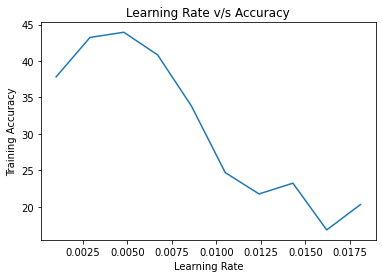

In [10]:
max_lr = 0.02
min_lr = 0.001
epoch = 10
criterion = nn.NLLLoss()
range_test = RangeTest(Net, epoch, max_lr, min_lr, criterion, train_dataloader)
max_lr = range_test.lr_range_test()

## Actual Training 24 epochs

In [0]:
epochs = 24
criterion = nn.NLLLoss()
optimizer = optim.SGD(Net.parameters(), lr=1e-3, momentum=0.9)

In [0]:
scheduler = OneCycleLR(optimizer, max_lr=0.015, steps_per_epoch=1,
                       epochs=epochs, div_factor=8, final_div_factor=8,
                       cycle_momentum=False, base_momentum=0.8, max_momentum=0.9,
                       pct_start=0.2083)

In [13]:
run = RunModel(Net, train_dataloader, test_dataloader, optimizer, scheduler, epochs, criterion)
run.train_test()


  0%|          | 0/98 [00:00<?, ?it/s]


Epoch 1:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0027, Accuracy: 5141/10000 (51.41%)


Epoch 2:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0022, Accuracy: 6020/10000 (60.20%)


Epoch 3:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0018, Accuracy: 6930/10000 (69.30%)


Epoch 4:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0015, Accuracy: 7313/10000 (73.13%)


Epoch 5:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0014, Accuracy: 7636/10000 (76.36%)


Epoch 6:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0013, Accuracy: 7728/10000 (77.28%)


Epoch 7:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0013, Accuracy: 7834/10000 (78.34%)


Epoch 8:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0013, Accuracy: 7860/10000 (78.60%)


Epoch 9:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0011, Accuracy: 8076/10000 (80.76%)


Epoch 10:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0011, Accuracy: 8127/10000 (81.27%)


Epoch 11:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0010, Accuracy: 8230/10000 (82.30%)


Epoch 12:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0011, Accuracy: 8123/10000 (81.23%)


Epoch 13:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0010, Accuracy: 8300/10000 (83.00%)


Epoch 14:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0010, Accuracy: 8403/10000 (84.03%)


Epoch 15:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0010, Accuracy: 8393/10000 (83.93%)


Epoch 16:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8474/10000 (84.74%)


Epoch 17:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8441/10000 (84.41%)


Epoch 18:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8465/10000 (84.65%)


Epoch 19:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8479/10000 (84.79%)


Epoch 20:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8456/10000 (84.56%)


Epoch 21:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8565/10000 (85.65%)


Epoch 22:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8534/10000 (85.34%)


Epoch 23:
---------


  0%|          | 0/98 [00:00<?, ?it/s]

Testing: Average loss: 0.0009, Accuracy: 8537/10000 (85.37%)


Epoch 24:
---------


 Loss=0.21839749813079834 Train Accuracy=90.03%: 100%|██████████| 98/98 [00:21<00:00,  4.56it/s]


Testing: Average loss: 0.0009, Accuracy: 8567/10000 (85.67%)



## Train-Test Accuracy and Loss Graphs

In [0]:
train_acc, test_acc = run.get_accuracies()
train_losses, test_losses = run.get_losses()

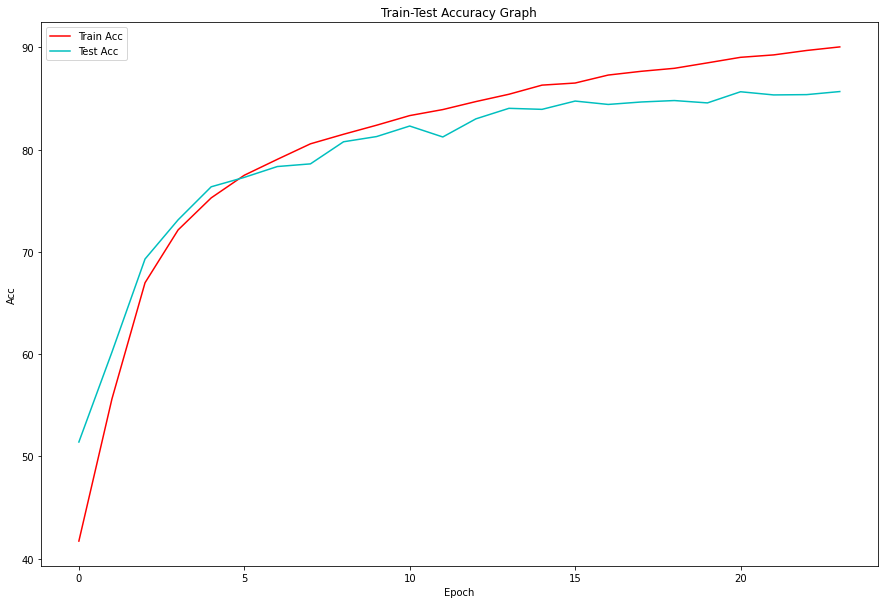

In [15]:
helper.plot_acc_graph(train_acc, test_acc, epochs)

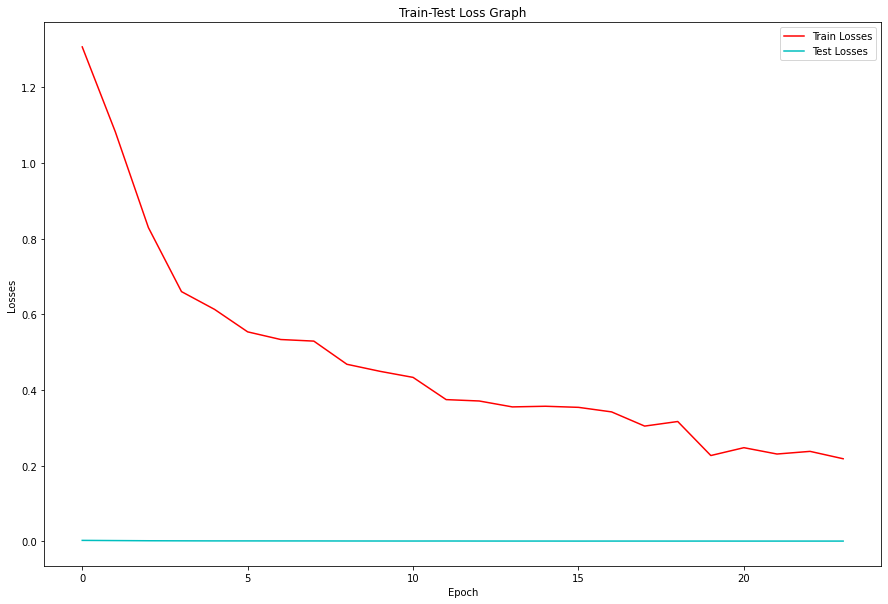

In [16]:
helper.plot_loss_graph(train_losses, test_losses, epochs)